### Earthquake magnitude and dept prediction

**1.Importing necessary libraries.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

**2.Importing Dataset**

In [ ]:
data=pd.read_csv('/content/Preprocessed_earthquake dataset.csv')
data.head()

,Time,Place,Latitude,Longitude,Depth,Mag
0,2023-02-17T09:37:34.868Z,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1
1,2023-02-16T05:37:05.138Z,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.6
2,2023-02-15T18:10:10.060Z,"Masbate region, Philippines",12.3238,123.8662,20.088,6.1
3,2023-02-15T06:38:09.034Z,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.7
4,2023-02-14T13:16:51.072Z,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.6


**3.Exploratory Data Analysis**

In [ ]:
data.shape

(37047, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37047 entries, 0 to 37046
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       37047 non-null  object 
 1   Place      37047 non-null  object 
 2   Latitude   37047 non-null  float64
 3   Longitude  37047 non-null  float64
 4   Depth      37047 non-null  float64
 5   Mag        37047 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.7+ MB


In [ ]:
data.describe()

,Latitude,Longitude,Depth,Mag
count,37047.000000,37047.000000,37047.000000,37047.000000
mean,5.576686,39.135370,58.585959,5.948406
std,30.720325,123.071796,109.226197,0.455119
min,-77.080000,-179.997000,-4.000000,5.500000
25%,-16.308500,-75.733150,15.000000,5.600000
50%,1.236000,98.850000,29.000000,5.800000
75%,33.887000,143.391000,42.000000,6.140000
max,87.199000,180.000000,700.000000,9.500000


In [ ]:
data.isnull().sum()

Time         0
Place        0
Latitude     0
Longitude    0
Depth        0
Mag          0
dtype: int64

**4.Data Preprocessing**

In [ ]:
# date and time column is converted to Timestamp to improve efficiency of the model.
data['Timestamp'] = pd.to_datetime(data['Time']).astype(int)// 10**9

In [ ]:
#The previous Time-date column is dropped.
data.drop(columns='Time',inplace=True)

In [ ]:
data.head()

,Place,Latitude,Longitude,Depth,Mag,Timestamp
0,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1,1676626654
1,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.6,1676525825
2,"Masbate region, Philippines",12.3238,123.8662,20.088,6.1,1676484610
3,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.7,1676443089
4,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.6,1676380611


**5.Data Visualization**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 53.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


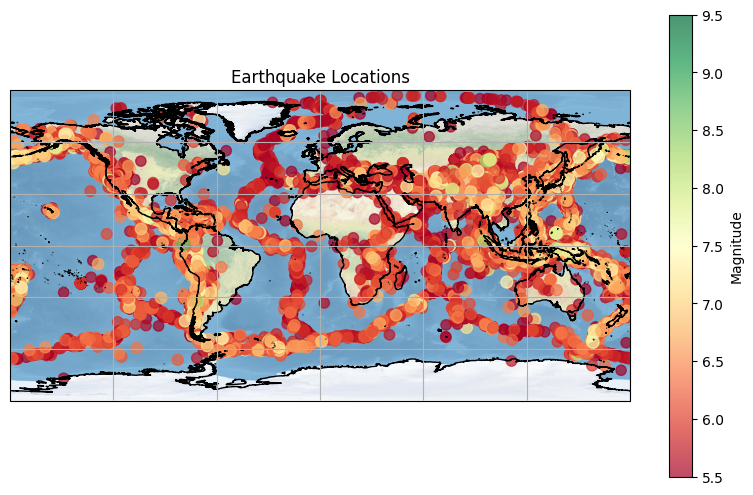

In [ ]:
#Cartopy is a library that helps display data on a world map
!pip install cartopy
import cartopy.crs as ccrs

# Reading the earthquake data from the CSV file
ofile = '/content/Preprocessed_earthquake dataset.csv'
data = pd.read_csv(ofile)

# Extract latitude, longitude, and magnitude columns from the dataset
latitude = data['Latitude']
longitude = data['Longitude']
magnitude = data['Mag']

# Create a map using Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add the map features
ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.stock_img()
ax.gridlines()

# Plot earthquake data on the map
scatter = ax.scatter(longitude, latitude, c=magnitude, cmap='RdYlGn', s=magnitude * 10, alpha=0.7,
                     transform=ccrs.PlateCarree())

# Adding colorbar to show magnitude intensity
plt.colorbar(scatter, label='Magnitude')


plt.title('Earthquake Locations')
plt.show()

**6.Splitting the dataset**

**Feature Selection and Target Variable**

In [ ]:
# date and time column is converted to Timestamp to improve efficiency of the model.
data['Timestamp'] = pd.to_datetime(data['Time']).astype(int)// 10**9

In [ ]:
#The previous Time-date column is dropped.
data.drop(columns='Time',inplace=True)

In [ ]:
# Selecting features and target variables
features = ['Longitude', 'Latitude', 'Timestamp']
target_magnitude = 'Mag'
target_depth = 'Depth'

# Splitting the dataset into features and targets
X = data[features]
y_magnitude = data[target_magnitude]
y_depth = data[target_depth]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train_magnitude, y_test_magnitude, y_train_depth, y_test_depth = train_test_split(
    X, y_magnitude, y_depth, test_size=0.2, random_state=42)

**7.Training the model to predict the value of magnitude and depth of earthquake using different methods**

**7.1 Using Support Vector Machine**

In [ ]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing SVM models for magnitude and depth prediction
svm_magnitude = SVR(kernel='rbf')
svm_depth = SVR(kernel='rbf')

# Train SVM models
svm_magnitude.fit(X_train_scaled, y_train_magnitude)
svm_depth.fit(X_train_scaled, y_train_depth)

# Predictions on test set
predictions_magnitude = svm_magnitude.predict(X_test_scaled)
predictions_depth = svm_depth.predict(X_test_scaled)
print(predictions_magnitude)
print(predictions_depth)
# Evaluate the predictions
mse_magnitude = mean_squared_error(y_test_magnitude, predictions_magnitude)
mae_magnitude = mean_absolute_error(y_test_magnitude, predictions_magnitude)
print(f'Magnitude Prediction - Mean Squared Error: {mse_magnitude}')
print(f'Magnitude Prediction - Mean Absolute Error: {mae_magnitude}')

mse_depth = mean_squared_error(y_test_depth, predictions_depth)
mae_depth = mean_absolute_error(y_test_depth, predictions_depth)
print(f'Depth Prediction - Mean Squared Error: {mse_depth}')
print(f'Depth Prediction - Mean Absolute Error: {mae_depth}')


[5.87326704 5.92147644 5.74882384 ... 5.78909263 5.80212949 5.68115949]
[28.77603956 29.36959531 36.69968679 ... 24.72267356 31.36153051
 33.68860521]
Magnitude Prediction - Mean Squared Error: 0.1962395513550825
Magnitude Prediction - Mean Absolute Error: 0.3006540733334305
Depth Prediction - Mean Squared Error: 13265.354052689756
Depth Prediction - Mean Absolute Error: 42.455023602702354


**7.2 Using Gradient Boosting Regressor**

In [ ]:
# Initializing Gradient Boosting Regressor models for magnitude and depth prediction
gb_model_magnitude = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model_depth = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the models
gb_model_magnitude.fit(X_train, y_train_magnitude)
gb_model_depth.fit(X_train, y_train_depth)

# Predictions on test set
predictions_magnitude = gb_model_magnitude.predict(X_test)
predictions_depth = gb_model_depth.predict(X_test)
print(predictions_magnitude)
print(predictions_depth)

# Evaluate the predictions
mse_magnitude = mean_squared_error(y_test_magnitude, predictions_magnitude)
mae_magnitude = mean_absolute_error(y_test_magnitude, predictions_magnitude)
print(f'Magnitude Prediction - Mean Squared Error: {mse_magnitude}')
print(f'Magnitude Prediction - Mean Absolute Error: {mae_magnitude}')

mse_depth = mean_squared_error(y_test_depth, predictions_depth)
mae_depth = mean_absolute_error(y_test_depth, predictions_depth)
print(f'Depth Prediction - Mean Squared Error: {mse_depth}')
print(f'Depth Prediction - Mean Absolute Error: {mae_depth}')

[5.90668518 6.00606363 5.88038346 ... 5.88603733 5.88126102 5.85593288]
[19.28295272 50.15436117 58.97062155 ... 46.25733408 74.91479529
 91.8548825 ]
Magnitude Prediction - Mean Squared Error: 0.18136899623279834
Magnitude Prediction - Mean Absolute Error: 0.3150711589294853
Depth Prediction - Mean Squared Error: 5024.783432954373
Depth Prediction - Mean Absolute Error: 35.55092384798622


**7.3 Using Decision Tree**

In [ ]:


# Initializing Decision Tree Regressor models for magnitude and depth prediction
dt_model_magnitude = DecisionTreeRegressor(random_state=42)
dt_model_depth = DecisionTreeRegressor(random_state=42)

# Fit the models
dt_model_magnitude.fit(X_train, y_train_magnitude)
dt_model_depth.fit(X_train, y_train_depth)

# Predictions on test set
predictions_magnitude = dt_model_magnitude.predict(X_test)
predictions_depth = dt_model_depth.predict(X_test)

# Evaluate the predictions
mse_magnitude = mean_squared_error(y_test_magnitude, predictions_magnitude)
mae_magnitude = mean_absolute_error(y_test_magnitude, predictions_magnitude)
print(f'Magnitude Prediction - Mean Squared Error: {mse_magnitude}')
print(f'Magnitude Prediction - Mean Absolute Error: {mae_magnitude}')

mse_depth = mean_squared_error(y_test_depth, predictions_depth)
mae_depth = mean_absolute_error(y_test_depth, predictions_depth)
print(f'Depth Prediction - Mean Squared Error: {mse_depth}')
print(f'Depth Prediction - Mean Absolute Error: {mae_depth}')


Magnitude Prediction - Mean Squared Error: 0.35652251012145747
Magnitude Prediction - Mean Absolute Error: 0.41819973009446704
Depth Prediction - Mean Squared Error: 3303.7975556757415
Depth Prediction - Mean Absolute Error: 20.544892823315486


**7.4 Ensemble Learning**

In [ ]:
from sklearn.ensemble import VotingRegressor

# Ensemble model for magnitude prediction
estimators_magnitude = [('svm_magnitude', svm_magnitude),
                        ('gb_model_magnitude', gb_model_magnitude),
                        ('dt_model_magnitude', dt_model_magnitude)]

# Ensemble model for depth prediction
estimators_depth = [('svm_depth', svm_depth),
                    ('gb_model_depth', gb_model_depth),
                    ('dt_model_depth', dt_model_depth)]

# Creating the ensemble models using VotingRegressor
ensemble_model_magnitude = VotingRegressor(estimators=estimators_magnitude)
ensemble_model_depth = VotingRegressor(estimators=estimators_depth)

# Fit the ensemble models
ensemble_model_magnitude.fit(X_train, y_train_magnitude)
ensemble_model_depth.fit(X_train, y_train_depth)

# Predictions on test set for both magnitude and depth
predictions_magnitude = ensemble_model_magnitude.predict(X_test)
predictions_depth = ensemble_model_depth.predict(X_test)
print(predictions_magnitude)
print(predictions_depth)

# Evaluate the predictions for both magnitude and depth
mse_magnitude = mean_squared_error(y_test_magnitude, predictions_magnitude)
mae_magnitude = mean_absolute_error(y_test_magnitude, predictions_magnitude)
print(f'Magnitude Prediction - Mean Squared Error (Ensemble): {mse_magnitude}')
print(f'Magnitude Prediction - Mean Absolute Error (Ensemble): {mae_magnitude}')

mse_depth = mean_squared_error(y_test_depth, predictions_depth)
mae_depth = mean_absolute_error(y_test_depth, predictions_depth)
print(f'Depth Prediction - Mean Squared Error (Ensemble): {mse_depth}')
print(f'Depth Prediction - Mean Absolute Error (Ensemble): {mae_depth}')


[5.74951439 5.9800512  5.71521151 ... 5.82865424 5.99308869 6.05377505]
[19.83865122 45.54885993 64.89839874 ... 31.8810605  47.32515864
 55.34123875]
Magnitude Prediction - Mean Squared Error (Ensemble): 0.20053896959146073
Magnitude Prediction - Mean Absolute Error (Ensemble): 0.3211877698692695
Depth Prediction - Mean Squared Error (Ensemble): 4495.945080887654
Depth Prediction - Mean Absolute Error (Ensemble): 29.951258172662467
